In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [2]:
IMAGE_SIDE = 400

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from google.colab import files
files.upload()

Saving losses.py to losses.py
Saving model_wrapper.py to model_wrapper.py
Saving models.py to models.py
Saving utils.py to utils.py


{'losses.py': b"import tensorflow.keras.backend as K\r\n\r\n#custom losses\r\n\r\ndef soft_dice_loss(y_true, y_pred, smooth = 1):\r\n    y_true_f = K.flatten(y_true)\r\n    y_pred_f = K.flatten(y_pred)\r\n    intersection = K.sum(y_true_f * y_pred_f)\r\n    union_approx = K.sum(y_true_f) + K.sum(y_pred_f)\r\n    inters_oer_union_approx = (2 * intersection + smooth) / (union_approx + smooth)\r\n    return 1 -  inters_oer_union_approx\r\n\r\n\r\ndef weighted_binary_crossentropy(y_true, y_pred, weight=4):\r\n    '''\r\n    weight: int\r\n        weight to be set to road labels while retaining 1 weight for non-road labels\r\n    '''\r\n    weights = y_true * (weight-1) + 1\r\n    weighted_bce = K.binary_crossentropy(y_true, y_pred) * weights\r\n    return K.mean(weighted_bce)\r\n\r\n\r\ndef total_variation(image):\r\n    x_diff = K.abs(image[:,1:,:,:] - image[:,:-1,:,:])\r\n    y_diff = K.abs(image[:,:,1:,:] - image[:,:,:-1,:])\r\n    return K.mean(x_diff)+K.mean(y_diff)\r\n\r\n\r\nclass S

In [5]:
from utils import *
from losses import *
from models import *
from model_wrapper import *

In [16]:
x_train, y_train = load_train_data()
y_train = transform_labels(y_train)
x_train, y_train, x_test, y_test = train_test_split(x_train, y_train, validation_ratio=0.2)

test_data = load_test_data()
print(x_train.shape)
print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print(test_data.shape)

(80, 400, 400, 3)
(80, 400, 400, 1)
(50, 608, 608, 3)


# Hyperparameters tuning: depth and input_side

# Draw results

In [9]:
params = {}
params['input_side'] = 64
params['image_side'] = IMAGE_SIDE
params['num_blocks'] = 3
params['activation_'] = 'elu'
params['regularizer_'] = None
params['starting_num_channels'] = 16
params['metrics'] = [F1_score]
params['metrics_names'] = ['loss', 'F1_score']
params['batch_size'] = 16
params['batches_per_epoch'] = 200
params['reg_name'] = None
params['lambd'] = 0
params['loss'] = soft_dice_loss
params['main_metric_fn'] = F1_score 
params['optimizer'] = tf.keras.optimizers.Adam()
params['path'] = '/saved models/sd_3_64_1' #Need to change? #sd = soft_dice, 3 = num_blocks, 64 = input_side, 1 - version

In [10]:
params['input_side'] = 64
params['num_blocks'] = 3
params['path'] = '/saved models/sd_3_64_1'
model_sd_3_64_1 = get_Unet_model(params)
model_wrapper_sd_3_64_1 = ModelWrapper(model_sd_3_64_1, params)
model_wrapper_sd_3_64_1.load_model()

In [11]:
params['input_side'] = 64
params['num_blocks'] = 4
params['path'] = '/saved models/sd_4_64_1'
model_sd_4_64_1 = get_Unet_model(params)
model_wrapper_sd_4_64_1 = ModelWrapper(model_sd_4_64_1, params)
model_wrapper_sd_4_64_1.load_model()

In [12]:
params['input_side'] = 64
params['num_blocks'] = 5
params['path'] = '/saved models/sd_5_64_1'
model_sd_5_64_1 = get_Unet_model(params)
model_wrapper_sd_5_64_1 = ModelWrapper(model_sd_5_64_1, params)
model_wrapper_sd_5_64_1.load_model()

In [13]:
params['input_side'] = 128
params['num_blocks'] = 4
params['path'] = '/saved models/sd_4_128_1'
model_sd_4_128_1 = get_Unet_model(params)
model_wrapper_sd_4_128_1 = ModelWrapper(model_sd_4_128_1, params)
model_wrapper_sd_4_128_1.load_model()

In [14]:
params['input_side'] = 128
params['num_blocks'] = 5
params['path'] = '/saved models/sd_5_128_1'
model_sd_5_128_1 = get_Unet_model(params)
model_wrapper_sd_5_128_1 = ModelWrapper(model_sd_5_128_1, params)
model_wrapper_sd_5_128_1.load_model()

In [15]:
params['input_side'] = 128
params['num_blocks'] = 6
params['path'] = '/saved models/sd_6_128_1'
model_sd_6_128_1 = get_Unet_model(params)
model_wrapper_sd_6_128_1 = ModelWrapper(model_sd_6_128_1, params)
model_wrapper_sd_6_128_1.load_model()

In [16]:
params['input_side'] = 128
params['num_blocks'] = 5
params['path'] = '/saved models/sd_5_128_2'
model_sd_5_128_2 = get_Unet_model(params)
model_wrapper_sd_5_128_2 = ModelWrapper(model_sd_5_128_2, params)
model_wrapper_sd_5_128_2.load_model()

In [17]:
params['input_side'] = 128
params['num_blocks'] = 5
params['path'] = '/saved models/sd_5_128_3'
model_sd_5_128_3 = get_Unet_model(params)
model_wrapper_sd_5_128_3 = ModelWrapper(model_sd_5_128_3, params)
model_wrapper_sd_5_128_3.load_model()

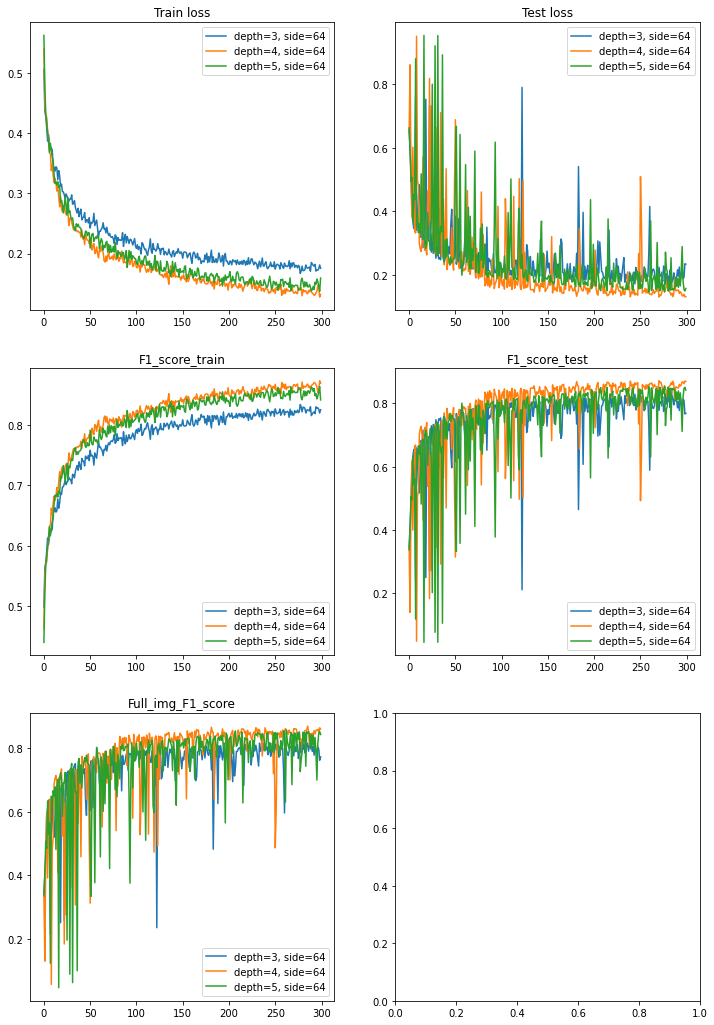

In [18]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

ax[0,0].plot(model_wrapper_sd_3_64_1.metrics_per_epoch['loss_train'], label='depth=3, side=64')
ax[0,0].plot(model_wrapper_sd_4_64_1.metrics_per_epoch['loss_train'], label='depth=4, side=64')
ax[0,0].plot(model_wrapper_sd_5_64_1.metrics_per_epoch['loss_train'], label='depth=5, side=64')
ax[0,0].set_title('Train loss')
ax[0,0].legend()

ax[0,1].plot(model_wrapper_sd_3_64_1.metrics_per_epoch['loss_test'], label='depth=3, side=64')
ax[0,1].plot(model_wrapper_sd_4_64_1.metrics_per_epoch['loss_test'], label='depth=4, side=64')
ax[0,1].plot(model_wrapper_sd_5_64_1.metrics_per_epoch['loss_test'], label='depth=5, side=64')
ax[0,1].set_title('Test loss')
ax[0,1].legend()

ax[1,0].plot(model_wrapper_sd_3_64_1.metrics_per_epoch['F1_score_train'], label='depth=3, side=64')
ax[1,0].plot(model_wrapper_sd_4_64_1.metrics_per_epoch['F1_score_train'], label='depth=4, side=64')
ax[1,0].plot(model_wrapper_sd_5_64_1.metrics_per_epoch['F1_score_train'], label='depth=5, side=64')
ax[1,0].set_title('F1_score_train')
ax[1,0].legend()

ax[1,1].plot(model_wrapper_sd_3_64_1.metrics_per_epoch['F1_score_test'], label='depth=3, side=64')
ax[1,1].plot(model_wrapper_sd_4_64_1.metrics_per_epoch['F1_score_test'], label='depth=4, side=64')
ax[1,1].plot(model_wrapper_sd_5_64_1.metrics_per_epoch['F1_score_test'], label='depth=5, side=64')
ax[1,1].set_title('F1_score_test')
ax[1,1].legend()

ax[2,0].plot(model_wrapper_sd_3_64_1.metrics_per_epoch['Full_img_F1_score'], label='depth=3, side=64')
ax[2,0].plot(model_wrapper_sd_4_64_1.metrics_per_epoch['Full_img_F1_score'], label='depth=4, side=64')
ax[2,0].plot(model_wrapper_sd_5_64_1.metrics_per_epoch['Full_img_F1_score'], label='depth=5, side=64')
ax[2,0].set_title('Full_img_F1_score')
ax[2,0].legend()

plt.show()

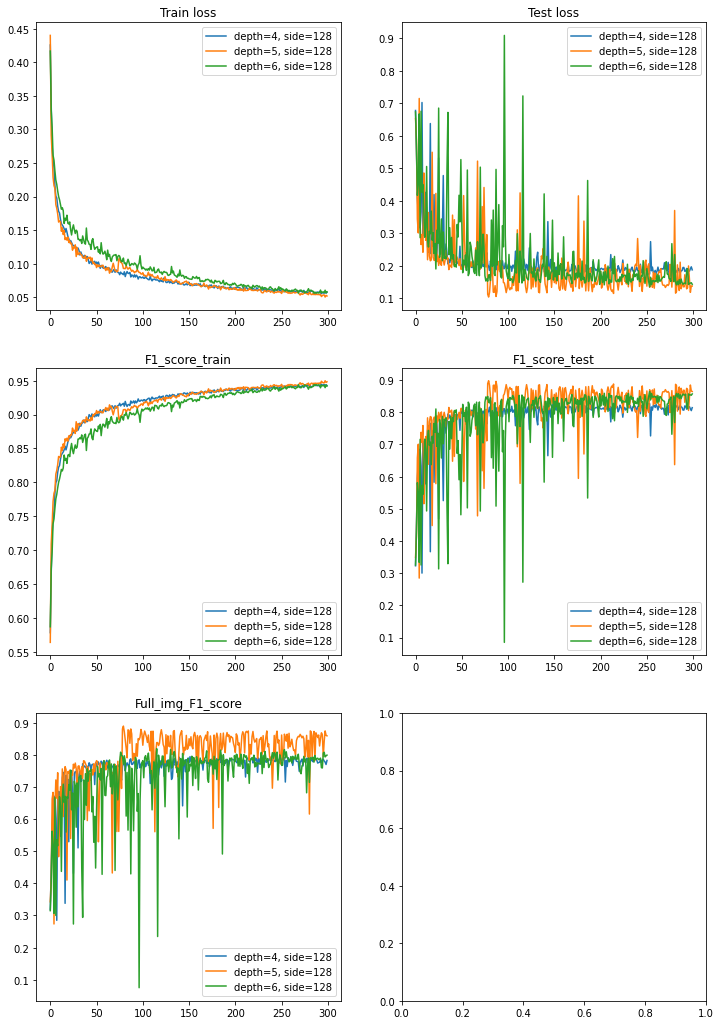

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

ax[0,0].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['loss_train'], label='depth=4, side=128')
ax[0,0].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['loss_train'], label='depth=5, side=128')
ax[0,0].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['loss_train'], label='depth=6, side=128')
ax[0,0].set_title('Train loss')
ax[0,0].legend()

ax[0,1].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['loss_test'], label='depth=4, side=128')
ax[0,1].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['loss_test'], label='depth=5, side=128')
ax[0,1].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['loss_test'], label='depth=6, side=128')
ax[0,1].set_title('Test loss')
ax[0,1].legend()

ax[1,0].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['F1_score_train'], label='depth=4, side=128')
ax[1,0].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['F1_score_train'], label='depth=5, side=128')
ax[1,0].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['F1_score_train'], label='depth=6, side=128')
ax[1,0].set_title('F1_score_train')
ax[1,0].legend()

ax[1,1].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['F1_score_test'], label='depth=4, side=128')
ax[1,1].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['F1_score_test'], label='depth=5, side=128')
ax[1,1].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['F1_score_test'], label='depth=6, side=128')
ax[1,1].set_title('F1_score_test')
ax[1,1].legend()

ax[2,0].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['Full_img_F1_score'], label='depth=4, side=128')
ax[2,0].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['Full_img_F1_score'], label='depth=5, side=128')
ax[2,0].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['Full_img_F1_score'], label='depth=6, side=128')
ax[2,0].set_title('Full_img_F1_score')
ax[2,0].legend()

plt.show()

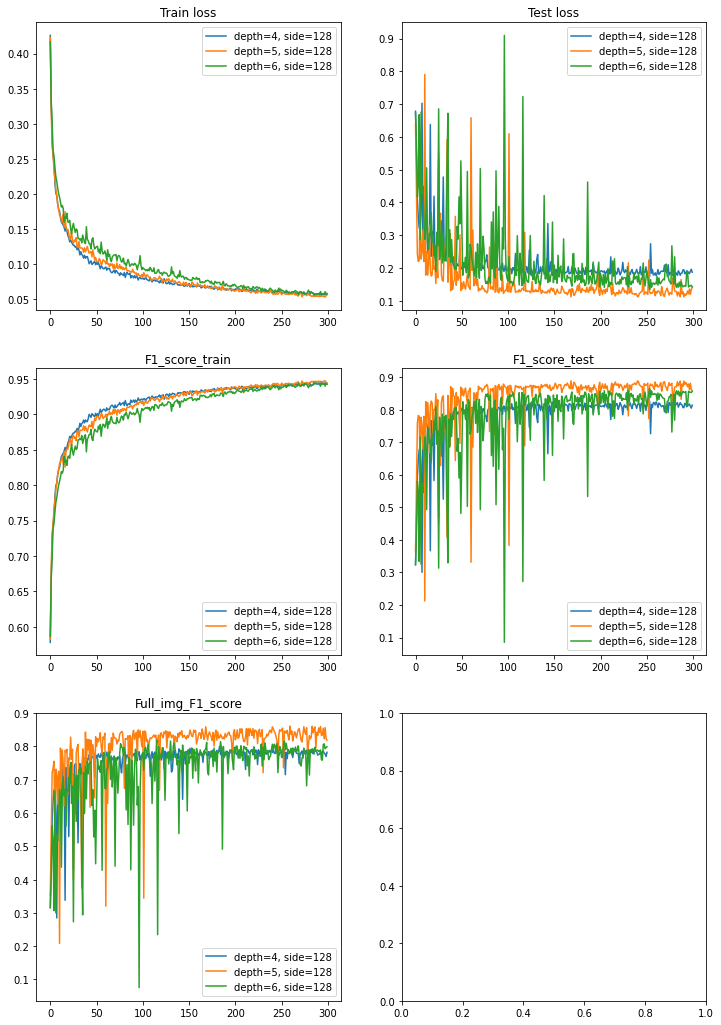

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

ax[0,0].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['loss_train'], label='depth=4, side=128')
ax[0,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['loss_train'], label='depth=5, side=128')
ax[0,0].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['loss_train'], label='depth=6, side=128')
ax[0,0].set_title('Train loss')
ax[0,0].legend()

ax[0,1].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['loss_test'], label='depth=4, side=128')
ax[0,1].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['loss_test'], label='depth=5, side=128')
ax[0,1].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['loss_test'], label='depth=6, side=128')
ax[0,1].set_title('Test loss')
ax[0,1].legend()

ax[1,0].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['F1_score_train'], label='depth=4, side=128')
ax[1,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['F1_score_train'], label='depth=5, side=128')
ax[1,0].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['F1_score_train'], label='depth=6, side=128')
ax[1,0].set_title('F1_score_train')
ax[1,0].legend()

ax[1,1].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['F1_score_test'], label='depth=4, side=128')
ax[1,1].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['F1_score_test'], label='depth=5, side=128')
ax[1,1].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['F1_score_test'], label='depth=6, side=128')
ax[1,1].set_title('F1_score_test')
ax[1,1].legend()

ax[2,0].plot(model_wrapper_sd_4_128_1.metrics_per_epoch['Full_img_F1_score'], label='depth=4, side=128')
ax[2,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['Full_img_F1_score'], label='depth=5, side=128')
ax[2,0].plot(model_wrapper_sd_6_128_1.metrics_per_epoch['Full_img_F1_score'], label='depth=6, side=128')
ax[2,0].set_title('Full_img_F1_score')
ax[2,0].legend()

plt.show()

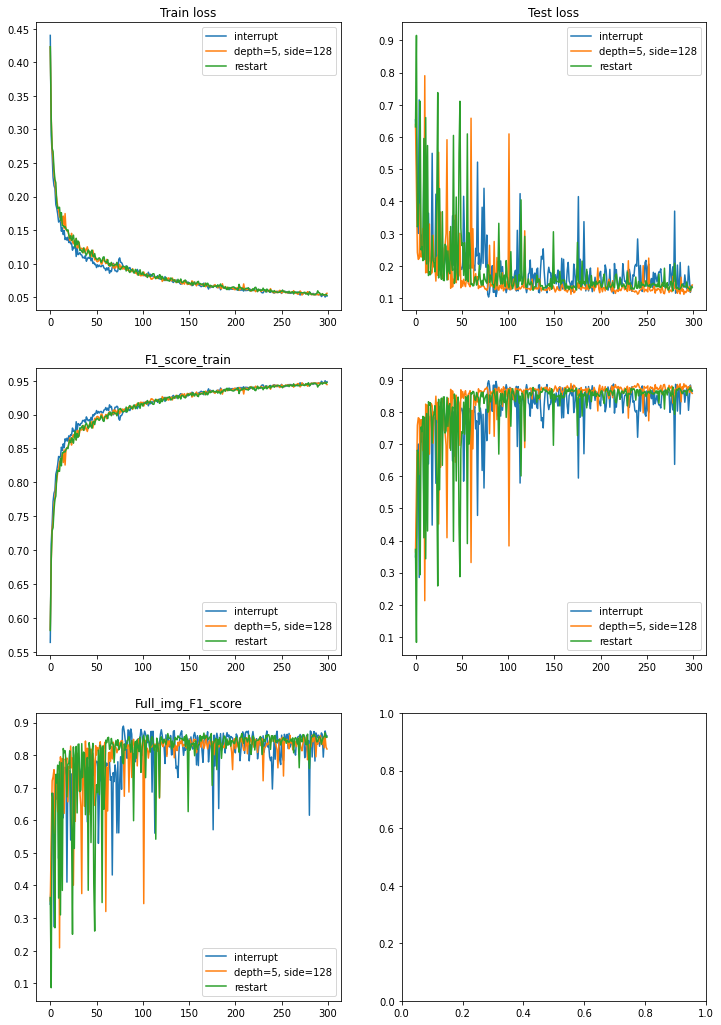

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

ax[0,0].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['loss_train'], label='interrupt')
ax[0,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['loss_train'], label='depth=5, side=128')
ax[0,0].plot(model_wrapper_sd_5_128_3.metrics_per_epoch['loss_train'], label='restart')
ax[0,0].set_title('Train loss')
ax[0,0].legend()

ax[0,1].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['loss_test'], label='interrupt')
ax[0,1].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['loss_test'], label='depth=5, side=128')
ax[0,1].plot(model_wrapper_sd_5_128_3.metrics_per_epoch['loss_test'], label='restart')
ax[0,1].set_title('Test loss')
ax[0,1].legend()

ax[1,0].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['F1_score_train'], label='interrupt')
ax[1,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['F1_score_train'], label='depth=5, side=128')
ax[1,0].plot(model_wrapper_sd_5_128_3.metrics_per_epoch['F1_score_train'], label='restart')
ax[1,0].set_title('F1_score_train')
ax[1,0].legend()

ax[1,1].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['F1_score_test'], label='interrupt')
ax[1,1].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['F1_score_test'], label='depth=5, side=128')
ax[1,1].plot(model_wrapper_sd_5_128_3.metrics_per_epoch['F1_score_test'], label='restart')
ax[1,1].set_title('F1_score_test')
ax[1,1].legend()

ax[2,0].plot(model_wrapper_sd_5_128_1.metrics_per_epoch['Full_img_F1_score'], label='interrupt')
ax[2,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['Full_img_F1_score'], label='depth=5, side=128')
ax[2,0].plot(model_wrapper_sd_5_128_3.metrics_per_epoch['Full_img_F1_score'], label='restart')
ax[2,0].set_title('Full_img_F1_score')
ax[2,0].legend()

plt.show()

In [7]:
#currently best model
params = {}
params['input_side'] = 128
params['image_side'] = IMAGE_SIDE
params['num_blocks'] = 5
params['activation_'] = 'elu'
params['regularizer_'] = None
params['starting_num_channels'] = 16
params['metrics'] = [F1_score]
params['metrics_names'] = ['loss', 'F1_score']
params['batch_size'] = 16
params['batches_per_epoch'] = 200
params['reg_name'] = None
params['lambd'] = 0
params['loss'] = soft_dice_loss
params['main_metric_fn'] = F1_score 
params['optimizer'] = tf.keras.optimizers.Adam()
params['path'] = '/saved models/sd_5_128_4' #Need to change? #sd = soft_dice, 5 = num_blocks, 128 = input_side, 1 - version

In [8]:
model = get_Unet_model(params)
model_wrapper = ModelWrapper(model, params)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_0 (Conv2D)               (None, 128, 128, 16) 448         input[0][0]                      
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d_0[0][0]                   
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [9]:
print(x_train.shape)
print(y_train.shape)

(100, 400, 400, 3)
(100, 400, 400, 1)


In [10]:
start_time = time.time()
model_wrapper.train(x_train, y_train, epochs=300)
print('time = {:.2f}'.format(time.time()-start_time))

Epoch: 0001: loss_train: 0.41990, F1_score_train: 0.58495, 
Epoch: 0002: loss_train: 0.29385, F1_score_train: 0.70683, 
Epoch: 0003: loss_train: 0.24541, F1_score_train: 0.75493, 
Epoch: 0004: loss_train: 0.22391, F1_score_train: 0.77632, 
Epoch: 0005: loss_train: 0.22694, F1_score_train: 0.77324, 
Epoch: 0006: loss_train: 0.20248, F1_score_train: 0.79763, 
Epoch: 0007: loss_train: 0.20099, F1_score_train: 0.79915, 
Epoch: 0008: loss_train: 0.18383, F1_score_train: 0.81628, 
Epoch: 0009: loss_train: 0.18447, F1_score_train: 0.81564, 
Epoch: 0010: loss_train: 0.17400, F1_score_train: 0.82609, 
Epoch: 0011: loss_train: 0.17481, F1_score_train: 0.82527, 
Epoch: 0012: loss_train: 0.16984, F1_score_train: 0.83023, 
Epoch: 0013: loss_train: 0.16759, F1_score_train: 0.83250, 
Epoch: 0014: loss_train: 0.16090, F1_score_train: 0.83916, 
Epoch: 0015: loss_train: 0.16386, F1_score_train: 0.83620, 
Epoch: 0016: loss_train: 0.15634, F1_score_train: 0.84372, 
Epoch: 0017: loss_train: 0.16301, F1_sco

In [11]:
preds = model_wrapper.predict(test_data, shift=8)

In [14]:
FILE_PATH = path=r'/content/gdrive/MyDrive/Univ/ML project 2'
def save_preds(preds):
    path = '/data/predictions'
    for i in range(len(preds)):
        img = Image.fromarray((preds[i,:,:,0] * 255.).astype(np.uint8))
        full_name = FILE_PATH + path + f'/pred_{i+1}.png'
        img.save(full_name)

In [15]:
save_preds(preds)

# L2 regularization on all conv-like layers

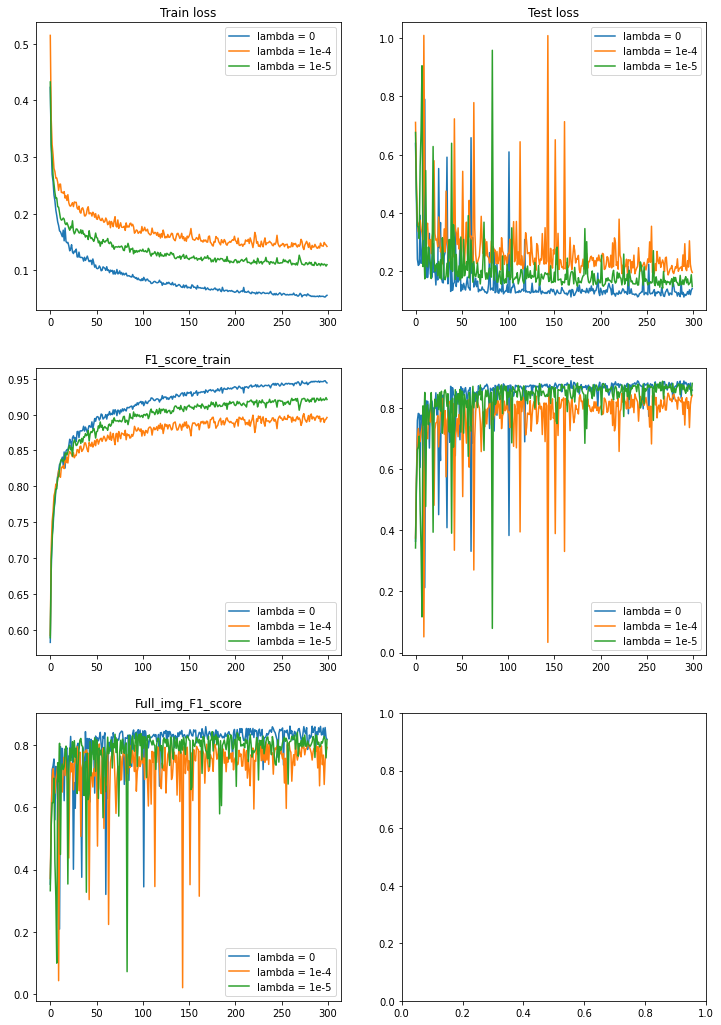

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

ax[0,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['loss_train'], label='lambda = 0')
ax[0,0].plot(model_wrapper_sd_5_128_l2_e4.metrics_per_epoch['loss_train'], label='lambda = 1e-4')
ax[0,0].plot(model_wrapper_sd_5_128_l2_e5.metrics_per_epoch['loss_train'], label='lambda = 1e-5')
ax[0,0].set_title('Train loss')
ax[0,0].legend()

ax[0,1].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['loss_test'], label='lambda = 0')
ax[0,1].plot(model_wrapper_sd_5_128_l2_e4.metrics_per_epoch['loss_test'], label='lambda = 1e-4')
ax[0,1].plot(model_wrapper_sd_5_128_l2_e5.metrics_per_epoch['loss_test'], label='lambda = 1e-5')
ax[0,1].set_title('Test loss')
ax[0,1].legend()

ax[1,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['F1_score_train'], label='lambda = 0')
ax[1,0].plot(model_wrapper_sd_5_128_l2_e4.metrics_per_epoch['F1_score_train'], label='lambda = 1e-4')
ax[1,0].plot(model_wrapper_sd_5_128_l2_e5.metrics_per_epoch['F1_score_train'], label='lambda = 1e-5')
ax[1,0].set_title('F1_score_train')
ax[1,0].legend()

ax[1,1].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['F1_score_test'], label='lambda = 0')
ax[1,1].plot(model_wrapper_sd_5_128_l2_e4.metrics_per_epoch['F1_score_test'], label='lambda = 1e-4')
ax[1,1].plot(model_wrapper_sd_5_128_l2_e5.metrics_per_epoch['F1_score_test'], label='lambda = 1e-5')
ax[1,1].set_title('F1_score_test')
ax[1,1].legend()

ax[2,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['Full_img_F1_score'], label='lambda = 0')
ax[2,0].plot(model_wrapper_sd_5_128_l2_e4.metrics_per_epoch['Full_img_F1_score'], label='lambda = 1e-4')
ax[2,0].plot(model_wrapper_sd_5_128_l2_e5.metrics_per_epoch['Full_img_F1_score'], label='lambda = 1e-5')
ax[2,0].set_title('Full_img_F1_score')
ax[2,0].legend()

plt.show()

In [8]:
from tensorflow.keras.regularizers import L2

def get_custom_model(optimizer, loss, metrics, input_side=128, base_activation='elu', 
              dropout_rate = 0.2):
    '''
    5 blocks
    adding l2 regularizers only to 2 last blocks of the decoder
    '''

    inputs = Input(shape=(INPUT_SIDE, INPUT_SIDE, 3))
    conv1 = Conv2D(16, (3,3), strides=(1,1), padding='same', activation=base_activation)(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Dropout(dropout_rate)(conv1)
    conv1 = Conv2D(16, (3,3), strides=(1,1), padding='same', activation=base_activation)(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPool2D((2, 2), strides=(2,2))(conv1)
    
    conv2 = Conv2D(32, (3,3), strides=(1,1), padding='same', activation=base_activation)(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Dropout(dropout_rate)(conv2)
    conv2 = Conv2D(32, (3,3), strides=(1,1), padding='same', activation=base_activation)(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPool2D((2, 2), strides=(2,2))(conv2)
    
    conv3 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation=base_activation)(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Dropout(dropout_rate)(conv3)
    conv3 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation=base_activation)(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPool2D((2, 2), strides=(2,2))(conv3)
    
    conv4 = Conv2D(128, (3,3), strides=(1,1), padding='same', activation=base_activation)(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Dropout(dropout_rate)(conv4)
    conv4 = Conv2D(128, (3,3), strides=(1,1), padding='same', activation=base_activation)(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPool2D((2, 2), strides=(2,2))(conv4)
    
    conv5 = Conv2D(256, (3,3), strides=(1,1), padding='same', activation=base_activation)(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Dropout(dropout_rate)(conv5)
    conv5 = Conv2D(256, (3,3), strides=(1,1), padding='same', activation=base_activation)(conv5)
    conv5 = BatchNormalization()(conv5)
    
    upsample6 = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', activation='linear')(conv5)
    upsample6 = Concatenate(axis=-1)([upsample6, conv4])
    conv6 = Conv2D(128, (3,3), strides=(1,1), padding='same', activation=base_activation)(upsample6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(dropout_rate)(conv6)
    conv6 = Conv2D(128, (3,3), strides=(1,1), padding='same', activation=base_activation)(conv6)
    conv6 = BatchNormalization()(conv6)
    
    upsample7 = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', activation='linear')(conv6)
    upsample7 = Concatenate(axis=-1)([upsample7, conv3])
    conv7 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation=base_activation)(upsample7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Dropout(dropout_rate)(conv7)
    conv7 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation=base_activation)(conv7)
    conv7 = BatchNormalization()(conv7)
    
    upsample8 = Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', kernel_regularizer=L2(1e-4), activation='linear')(conv7)
    upsample8 = Concatenate(axis=-1)([upsample8, conv2])
    conv8 = Conv2D(32, (3,3), strides=(1,1), padding='same', kernel_regularizer=L2(1e-4), activation=base_activation)(upsample8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Dropout(dropout_rate)(conv8)
    conv8 = Conv2D(32, (3,3), strides=(1,1), padding='same', kernel_regularizer=L2(1e-4), activation=base_activation)(conv8)
    conv8 = BatchNormalization()(conv8)
    
    upsample9 = Conv2DTranspose(16, (3,3), strides=(2,2), padding='same',kernel_regularizer=L2(1e-4),  activation='linear')(conv8)
    upsample9 = Concatenate(axis=-1)([upsample9, conv1])
    conv9 = Conv2D(16, (3,3), strides=(1,1), padding='same', kernel_regularizer=L2(1e-4), activation=base_activation)(upsample9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Dropout(dropout_rate)(conv9)
    conv9 = Conv2D(16, (3,3), strides=(1,1), padding='same', kernel_regularizer=L2(1e-4), activation=base_activation)(conv9)
    conv9 = BatchNormalization()(conv9)
    
    outputs = Conv2D(1, (3,3), strides=(1,1), padding='same', activation='sigmoid', name='conv2d_last')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
    return model

In [17]:
params = {}
params['input_side'] = 128
params['image_side'] = IMAGE_SIDE
params['num_blocks'] = 5
params['activation_'] = 'elu'
params['regularizer_'] = None
params['starting_num_channels'] = 16
params['metrics'] = [F1_score]
params['metrics_names'] = ['loss', 'F1_score']
params['batch_size'] = 16
params['batches_per_epoch'] = 200
params['reg_name'] = None
params['lambd'] = 0
params['loss'] = soft_dice_loss
params['main_metric_fn'] = F1_score
params['optimizer'] = tf.keras.optimizers.Adam()
params['path'] = '/saved models/sd_5_128_l2_custom' #Need to change? #sd = soft_dice, 5 = num_blocks, 128 = input_side, 1 - version

model_sd_5_128_l2_custom = get_custom_model('adam', soft_dice_loss, [F1_score])
model_wrapper_sd_5_128_l2_custom = ModelWrapper(model_sd_5_128_l2_custom, params)

In [18]:
model_wrapper_sd_5_128_l2_custom.train(x_train, y_train, x_test, y_test, epochs=300)

Epoch: 0001: loss_train: 0.41835, F1_score_train: 0.60231, loss_test: 0.67520, F1_score_test: 0.33782, Full_img_F1_score: 0.31832, 
Epoch: 0002: loss_train: 0.31022, F1_score_train: 0.70162, loss_test: 0.50651, F1_score_test: 0.50390, Full_img_F1_score: 0.48607, 
Epoch: 0003: loss_train: 0.26659, F1_score_train: 0.74227, loss_test: 0.45675, F1_score_test: 0.55071, Full_img_F1_score: 0.54380, 
Epoch: 0004: loss_train: 0.23530, F1_score_train: 0.77151, loss_test: 0.30001, F1_score_test: 0.70173, Full_img_F1_score: 0.67387, 
Epoch: 0005: loss_train: 0.21833, F1_score_train: 0.78710, loss_test: 0.29359, F1_score_test: 0.71208, Full_img_F1_score: 0.67217, 
Epoch: 0006: loss_train: 0.20758, F1_score_train: 0.79709, loss_test: 0.30877, F1_score_test: 0.69407, Full_img_F1_score: 0.63389, 
Epoch: 0007: loss_train: 0.18258, F1_score_train: 0.82124, loss_test: 0.24332, F1_score_test: 0.75929, Full_img_F1_score: 0.69507, 
Epoch: 0008: loss_train: 0.18022, F1_score_train: 0.82297, loss_test: 0.2400

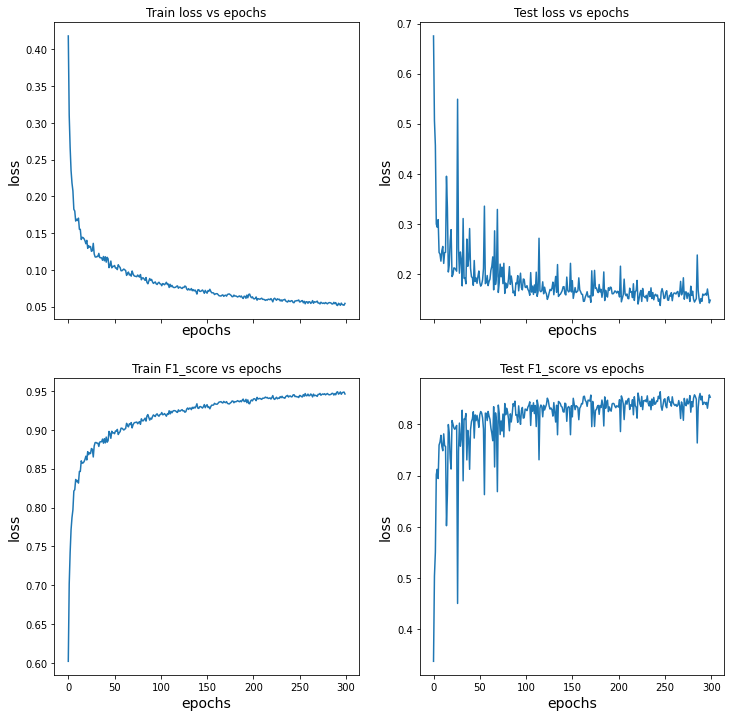

In [19]:
model_wrapper_sd_5_128_l2_custom.draw_metrics()

# L2 regularization for only conv-like layers in the last 2 decoder blocks

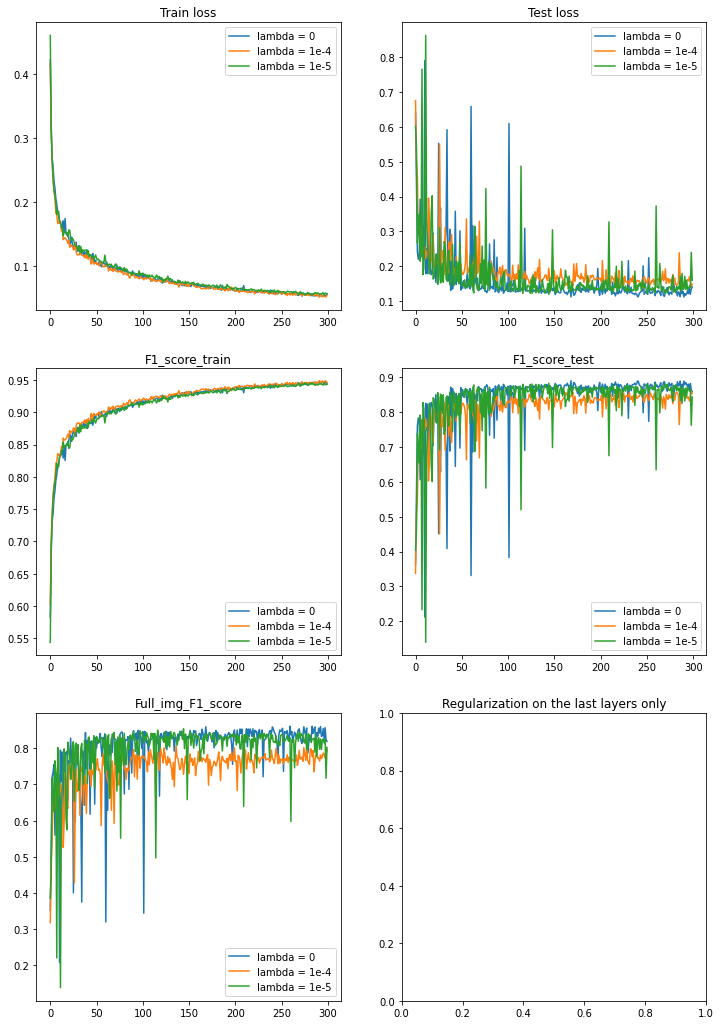

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

ax[0,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['loss_train'], label='lambda = 0')
ax[0,0].plot(model_wrapper_sd_5_128_l2_custom.metrics_per_epoch['loss_train'], label='lambda = 1e-4')
ax[0,0].plot(model_wrapper_sd_5_128_l2_custom_2.metrics_per_epoch['loss_train'], label='lambda = 1e-5')
ax[0,0].set_title('Train loss')
ax[0,0].legend()

ax[0,1].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['loss_test'], label='lambda = 0')
ax[0,1].plot(model_wrapper_sd_5_128_l2_custom.metrics_per_epoch['loss_test'], label='lambda = 1e-4')
ax[0,1].plot(model_wrapper_sd_5_128_l2_custom_2.metrics_per_epoch['loss_test'], label='lambda = 1e-5')
ax[0,1].set_title('Test loss')
ax[0,1].legend()

ax[1,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['F1_score_train'], label='lambda = 0')
ax[1,0].plot(model_wrapper_sd_5_128_l2_custom.metrics_per_epoch['F1_score_train'], label='lambda = 1e-4')
ax[1,0].plot(model_wrapper_sd_5_128_l2_custom_2.metrics_per_epoch['F1_score_train'], label='lambda = 1e-5')
ax[1,0].set_title('F1_score_train')
ax[1,0].legend()

ax[1,1].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['F1_score_test'], label='lambda = 0')
ax[1,1].plot(model_wrapper_sd_5_128_l2_custom.metrics_per_epoch['F1_score_test'], label='lambda = 1e-4')
ax[1,1].plot(model_wrapper_sd_5_128_l2_custom_2.metrics_per_epoch['F1_score_test'], label='lambda = 1e-5')
ax[1,1].set_title('F1_score_test')
ax[1,1].legend()

ax[2,0].plot(model_wrapper_sd_5_128_2.metrics_per_epoch['Full_img_F1_score'], label='lambda = 0')
ax[2,0].plot(model_wrapper_sd_5_128_l2_custom.metrics_per_epoch['Full_img_F1_score'], label='lambda = 1e-4')
ax[2,0].plot(model_wrapper_sd_5_128_l2_custom_2.metrics_per_epoch['Full_img_F1_score'], label='lambda = 1e-5')
ax[2,0].set_title('Full_img_F1_score')
ax[2,0].legend()
plt.title('Regularization on the last layers only')
plt.show()